In [115]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.optimize as spo
import sys
import seaborn as sns

%matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

%load_ext autoreload
%autoreload 2

sys.path.append('../../')

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/miguel/anaconda3/envs/cap_env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [50]:
data_df = pd.read_pickle('../../data/data_df.pkl')
print(data_df.shape)
data_df.head(25)

(30120, 503)


SPY         MMM          ABT  ABBV  ACN  ATVI  AYI  \
date       feature                                                              
1993-01-29 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          43.97       24.62         6.88   NaN  NaN   NaN  NaN   
           Low           43.75       24.47         6.75   NaN  NaN   NaN  NaN   
           Close         43.94       24.50         6.88   NaN  NaN   NaN  NaN   
           Volume   1003200.00  1242800.00   4638400.00   NaN  NaN   NaN  NaN   
1993-02-01 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          44.25       24.69         6.97   NaN  NaN   NaN  NaN   
           Low           43.97       24.47         6.78   NaN  NaN   NaN  NaN   
           Close         44.25       24.69         6.88   NaN  NaN   NaN  NaN   
           Volume    480500.00   749600.00   4450400.00   NaN  NaN   NaN  NaN   
1993-02-02 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          44.38       24.88         6.88   NaN  NaN   NaN  NaN   
           Low           44.12       24.69         6.53   NaN  NaN   NaN  NaN   
           Close         44.34       24.72         6.53   NaN  NaN   NaN  NaN   
           Volume    201300.00  1233600.00  10030000.00   NaN  NaN   NaN  NaN   
1993-02-03 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          44.84       25.41         6.94   NaN  NaN   NaN  NaN   
           Low           44.38       24.88         6.50   NaN  NaN   NaN  NaN   
           Close         44.81       25.19         6.91   NaN  NaN   NaN  NaN   
           Volume    529400.00  2900400.00  12490000.00   NaN  NaN   NaN  NaN   
1993-02-04 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          45.09       26.47         6.97   NaN  NaN   NaN  NaN   
           Low           44.88       25.88         6.78   NaN  NaN   NaN  NaN   
           Close         45.00       26.06         6.84   NaN  NaN   NaN  NaN   
           Volume    531500.00  4122400.00   5190800.00   NaN  NaN   NaN  NaN   

                           ADBE         AMD  AAP ...         XEL         XRX  \
date       feature                               ...                           
1993-01-29 Open            0.00        0.00  NaN ...        0.00        0.00   
           High            2.64       19.12  NaN ...       22.00       14.32   
           Low             2.56       18.62  NaN ...       21.88       13.84   
           Close           2.59       18.75  NaN ...       22.00       14.28   
           Volume    4990400.00   730600.00  NaN ...    87800.00  7633602.00   
1993-02-01 Open            0.00        0.00  NaN ...        0.00        0.00   
           High            2.75       19.25  NaN ...       22.19       14.24   
           Low             2.53       18.50  NaN ...       21.94       14.07   
           Close           2.72       19.12  NaN ...       22.19       14.09   
           Volume    8670400.00   750300.00  NaN ...    72400.00  3001200.00   
1993-02-02 Open            0.00        0.00  NaN ...        0.00        0.00   
           High            2.86       20.25  NaN ...       22.12       14.13   
           Low             2.73       19.38  NaN ...       21.88       13.99   
           Close           2.84       20.25  NaN ...       22.06       14.09   
           Volume   11491200.00  1418100.00  NaN ...   242200.00  1388598.00   
1993-02-03 Open            0.00        0.00  NaN ...        0.00        0.00   
           High            2.86       20.62  NaN ...       22.38       14.13   
           Low             2.69       20.12  NaN ...       22.12       14.01   
           Close           2.70       20.50  NaN ...       22.38       14.03   
           Volume   11788800.00  2163500.00  NaN ...   272200.00  1228200.00   
1993-02-04 Open            0.00        0.00  NaN ...        0.00        0.00   

In [51]:
data_df.unstack().describe()

SPY                                                       \
feature        Close         High          Low         Open        Volume   
count    6024.000000  6005.000000  6005.000000  6005.000000  6.024000e+03   
mean      120.379515   121.140626   119.524448    97.583151  5.931430e+07   
std        44.215695    44.437438    44.109630    69.694832  7.937370e+07   
min        43.410000    43.530000    42.810000     0.000000  0.000000e+00   
25%        92.847500    93.720000    91.600000     0.000000  5.380350e+06   
50%       119.540000   120.290000   118.770000   115.300000  3.417315e+07   
75%       141.412500   142.300000   140.570000   141.170000  7.948068e+07   
max       227.760000   228.340000   227.000000   227.410000  8.141804e+08   

                 MMM                                                       \
feature        Close         High          Low         Open        Volume   
count    6024.000000  6024.000000  6024.000000  6024.000000  6.024000e+03   
mean       74.138275    74.734484    73.493715    63.757797  3.009044e+06   
std        38.612950    38.757122    38.435405    50.283724  1.932584e+06   
min        23.620000    23.940000    23.190000     0.000000  0.000000e+00   
25%        44.802500    45.370000    44.250000     0.000000  1.789800e+06   
50%        71.500000    72.070000    70.975000    71.530000  2.613242e+06   
75%        86.860000    87.502500    86.212500    86.810000  3.720424e+06   
max       181.420000   182.270000   181.320000   181.730000  2.874960e+07   

             ...              ZION                                         \
feature      ...             Close         High          Low         Open   
count        ...       6023.000000  6022.000000  6022.000000  6022.000000   
mean         ...         38.208409    38.710394    37.703298    29.917592   
std          ...         21.335254    21.495934    21.175324    26.028264   
min          ...          6.480000     7.410000     5.900000     0.000000   
25%          ...         20.625000    20.947500    20.255000     0.000000   
50%          ...         30.900000    31.295000    30.445000    26.565000   
75%          ...         55.100000    55.895000    54.360000    51.920000   
max          ...         88.280000   107.210000    87.810000    88.270000   

                              ZTS                                      \
feature        Volume       Close        High         Low        Open   
count    6.023000e+03  987.000000  987.000000  987.000000  987.000000   
mean     1.614751e+06   40.142432   40.530537   39.714985   40.149909   
std      2.159297e+06    7.749647    7.809476    7.676569    7.749595   
min      0.000000e+00   28.400000   28.570000   28.140000   28.480000   
25%      2.684500e+05   32.170000   32.500000   31.855000   32.190000   
50%      6.121840e+05   42.370000   42.960000   41.580000   42.270000   
75%      2.390842e+06   47.145000   47.540000   46.720000   47.155000   
max      2.633482e+07   55.380000   55.380000   53.650000   53.930000   

                       
feature        Volume  
count    9.870000e+02  
mean     4.012389e+06  
std      3.810260e+06  
min      4.386320e+05  
25%      2.378748e+06  
50%      3.242213e+06  
75%      4.516790e+06  
max      6.678948e+07  

[8 rows x 2515 columns]

In [52]:
u_data_df = data_df.unstack()
print(u_data_df.shape)
u_data_df.head()

(6024, 2515)


SPY                                  MMM                     \
feature     Close   High    Low Open     Volume  Close   High    Low Open   
date                                                                        
1993-01-29  43.94  43.97  43.75  0.0  1003200.0  24.50  24.62  24.47  0.0   
1993-02-01  44.25  44.25  43.97  0.0   480500.0  24.69  24.69  24.47  0.0   
1993-02-02  44.34  44.38  44.12  0.0   201300.0  24.72  24.88  24.69  0.0   
1993-02-03  44.81  44.84  44.38  0.0   529400.0  25.19  25.41  24.88  0.0   
1993-02-04  45.00  45.09  44.88  0.0   531500.0  26.06  26.47  25.88  0.0   

                       ...     ZION                                ZTS       \
feature        Volume  ...    Close   High    Low Open    Volume Close High   
date                   ...                                                    
1993-01-29  1242800.0  ...    10.94  10.94  10.62  0.0   33600.0   NaN  NaN   
1993-02-01   749600.0  ...    11.06  11.25  10.75  0.0   32000.0   NaN  NaN   
1993-02-02  1233600.0  ...    11.12  11.12  10.88  0.0  251600.0   NaN  NaN   
1993-02-03  2900400.0  ...    11.25  11.28  10.88  0.0  254800.0   NaN  NaN   
1993-02-04  4122400.0  ...    11.69  11.75  11.44  0.0  317200.0   NaN  NaN   

                            
feature    Low Open Volume  
date                        
1993-01-29 NaN  NaN    NaN  
1993-02-01 NaN  NaN    NaN  
1993-02-02 NaN  NaN    NaN  
1993-02-03 NaN  NaN    NaN  
1993-02-04 NaN  NaN    NaN  

[5 rows x 2515 columns]

In [53]:
len(np.unique(u_data_df.columns.get_level_values(0)))

503

### So, there are 503 symbols, 6024 dates, and 5 features for each.

## Let's get the data used for the predictor part:

In [54]:
pred_df = u_data_df.loc[:,(slice(None), 'Close')]
pred_df.columns = pred_df.columns.droplevel('feature')
print(pred_df.shape)
pred_df.head()

(6024, 503)


,SPY,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,43.94,24.50,6.88,NaN,NaN,NaN,NaN,2.59,18.75,NaN,...,22.00,14.28,2.50,NaN,NaN,NaN,NaN,NaN,10.94,NaN
1993-02-01,44.25,24.69,6.88,NaN,NaN,NaN,NaN,2.72,19.12,NaN,...,22.19,14.09,2.62,NaN,NaN,NaN,NaN,NaN,11.06,NaN
1993-02-02,44.34,24.72,6.53,NaN,NaN,NaN,NaN,2.84,20.25,NaN,...,22.06,14.09,2.64,NaN,NaN,NaN,NaN,NaN,11.12,NaN
1993-02-03,44.81,25.19,6.91,NaN,NaN,NaN,NaN,2.70,20.50,NaN,...,22.38,14.03,2.68,NaN,NaN,NaN,NaN,NaN,11.25,NaN
1993-02-04,45.00,26.06,6.84,NaN,NaN,NaN,NaN,2.73,20.12,NaN,...,22.81,14.15,2.67,NaN,NaN,NaN,NaN,NaN,11.69,NaN


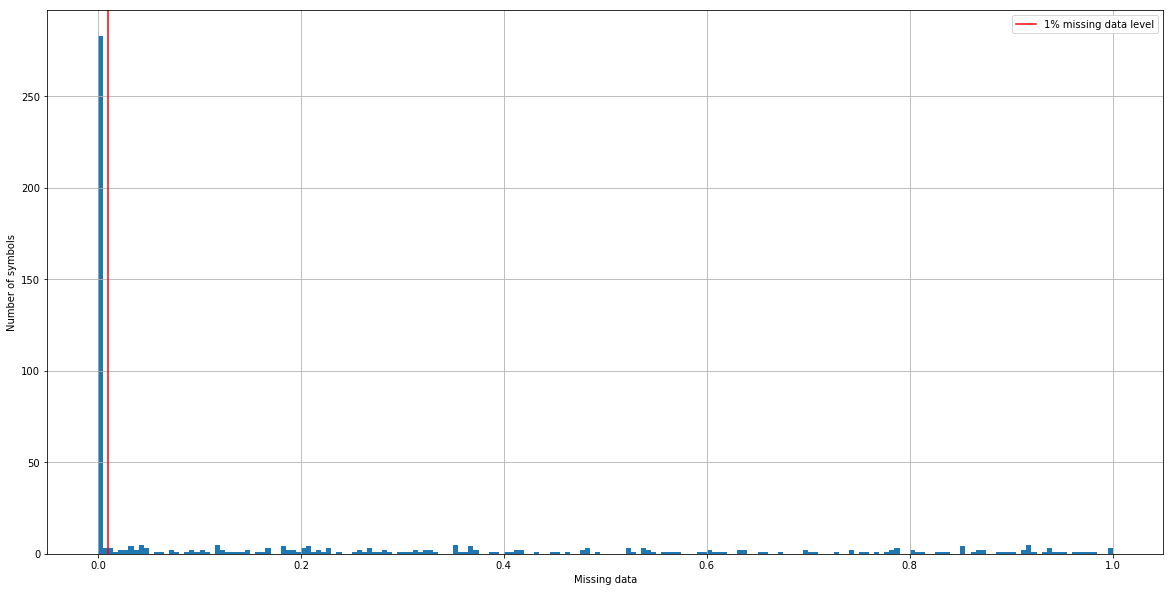

In [55]:
missing_df = pred_df.isnull().sum() / pred_df.shape[0]
missing_df.hist(bins=200)
plt.xlabel('Missing data')
plt.ylabel('Number of symbols')
plt.axvline(x=0.01, color='r', label='1% missing data level')
plt.legend()

In [56]:
description_df = pred_df.describe()
description_df

,SPY,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,6024.000000,6024.000000,6024.000000,1023.000000,3886.000000,5837.000000,3798.000000,6023.000000,6022.000000,3797.000000,...,6024.000000,6024.000000,6023.000000,112.000000,1312.000000,5214.000000,4853.000000,3882.000000,6023.000000,987.000000
mean,120.379515,74.138275,23.928069,55.164673,49.421904,8.717500,69.421403,29.287536,15.965330,64.918667,...,23.993572,16.756667,28.025208,35.003839,33.941387,24.188189,36.630474,70.848998,38.208409,40.142432
std,44.215695,38.612950,10.034862,8.991563,28.829258,9.591969,64.673705,24.356283,13.338299,47.194735,...,6.198760,11.937684,16.451688,1.585963,7.540993,16.424537,25.370764,23.899683,21.335254,7.749647
min,43.410000,23.620000,5.750000,33.000000,11.850000,0.290000,9.160000,2.060000,1.620000,12.530000,...,5.660000,4.170000,2.290000,32.810000,23.000000,0.660000,5.940000,25.020000,6.480000,28.400000
25%,92.847500,44.802500,18.840000,48.835000,26.330000,1.130000,27.815000,7.410000,5.870000,32.630000,...,20.250000,9.487500,15.425000,33.707500,27.220000,13.230000,13.950000,53.665000,20.625000,32.170000
50%,119.540000,71.500000,23.420000,56.230000,38.925000,6.040000,44.950000,27.030000,14.030000,42.300000,...,23.230000,13.330000,26.930000,34.320000,34.670000,21.770000,29.480000,68.465000,30.900000,42.370000
75%,141.412500,86.860000,27.720000,62.220000,72.365000,12.030000,71.472500,37.785000,22.347500,82.060000,...,27.460000,17.660000,38.485000,36.425000,37.415000,34.230000,63.060000,84.515000,55.100000,47.145000
max,227.760000,181.420000,51.200000,71.230000,125.400000,45.470000,279.150000,110.810000,94.810000,200.380000,...,45.330000,63.690000,97.940000,38.320000,54.750000,118.750000,94.880000,133.090000,88.280000,55.380000


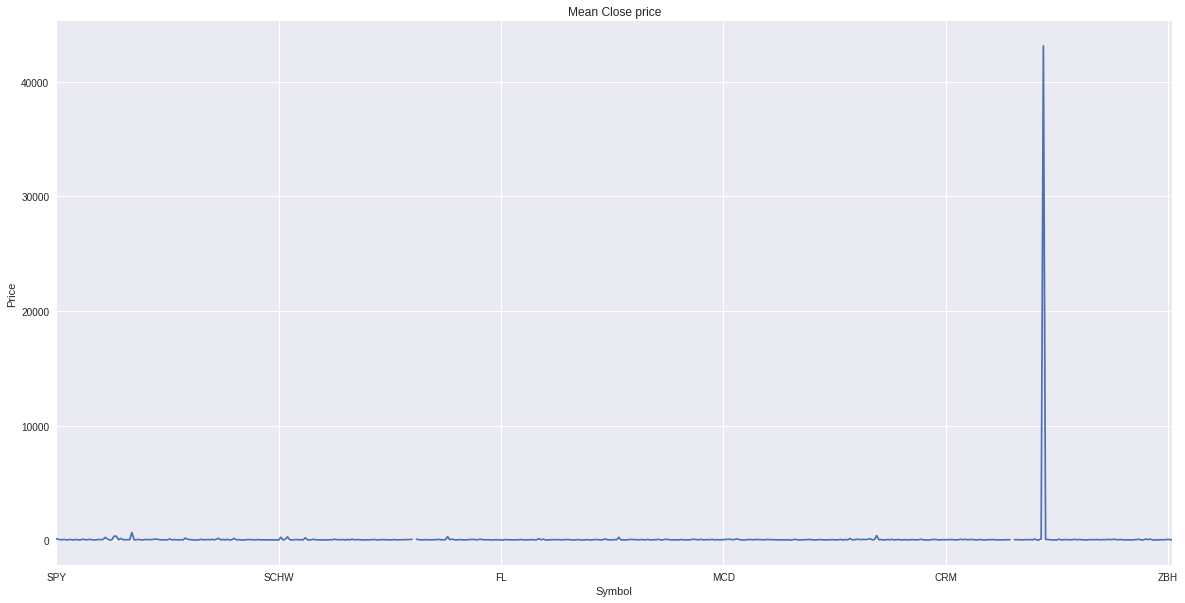

In [127]:
description_df.loc['mean'].plot()
plt.title('Mean Close price')
plt.xlabel('Symbol')
plt.ylabel('Price')

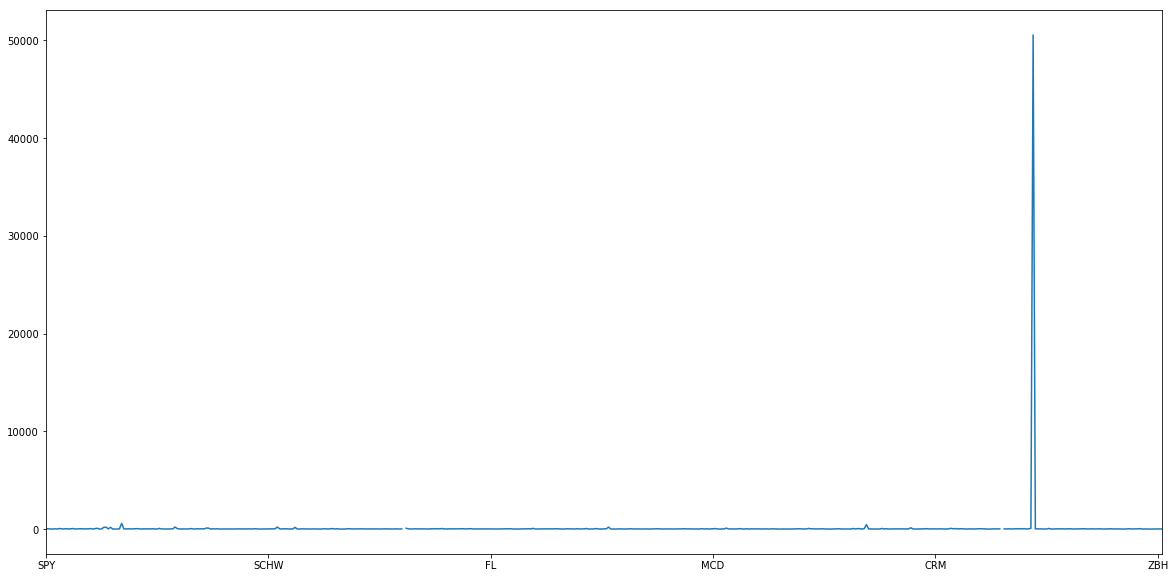

In [58]:
description_df.loc['std'].plot()

In [59]:
description_df.loc['mean'].argmax()

'RIG'

In [60]:
description_df['RIG']

count      5941.000000
mean      43135.840766
std       50552.663339
min           8.200000
25%          58.840000
50%       34031.250000
75%       64500.000000
max      242100.000000
Name: RIG, dtype: float64

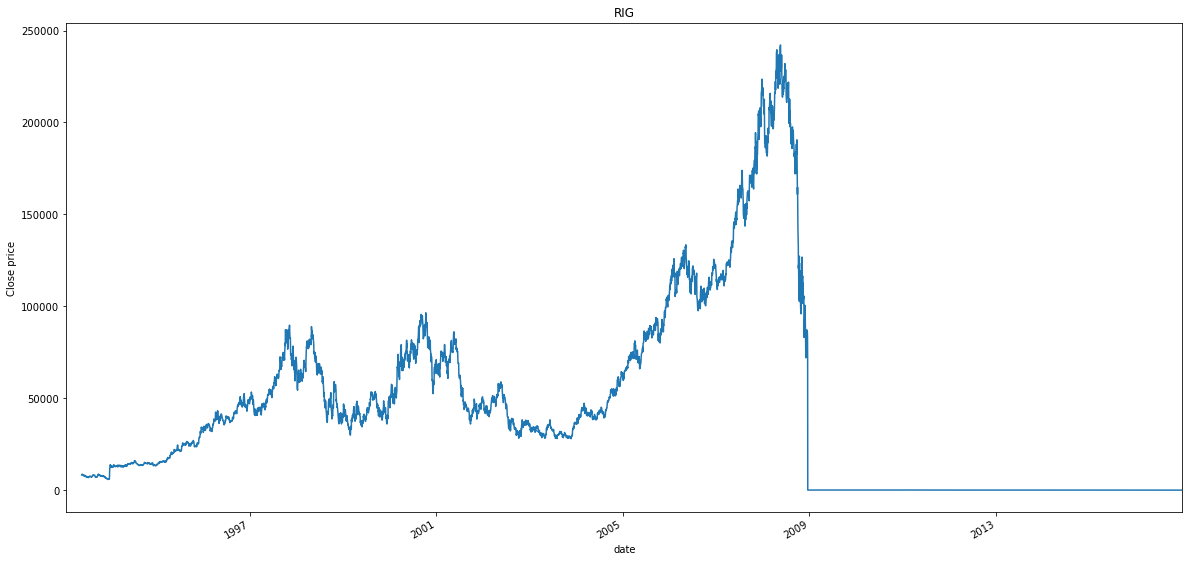

In [61]:
pred_df['RIG'].plot()
plt.ylabel('Close price')
plt.title('RIG')

### From Yahoo Finance:

Transocean Ltd., together with its subsidiaries, provides offshore contract drilling services for oil and gas wells worldwide. The company primarily offers deepwater and harsh environment drilling services. As of February 9, 2017, it owned or had partial ownership interests in, and operated 56 mobile offshore drilling units that consist of 30 ultra-deepwater floaters, 7 harsh environment floaters, 3 deepwater floaters, 6 midwater floaters, and 10 high-specification jackups. The company serves government-controlled oil companies and independent oil companies. Transocean Ltd. was founded in 1953 and is based in Vernier, Switzerland.

## The data of that ticker symbol doesn't match with the external sources...

### Let's see if there was a problem while downloading the data

In [71]:
from utils import data_sources as ds
%config Application.log_level="DEBUG"
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [74]:
rig_df = ds.download_ticker('RIG', ds.START_DATE, ds.END_DATE)

DEBUG:utils.data_sources:sd = 1993-01-22 00:00:00 , ed = 2003-01-20 00:00:00
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): www.google.com
DEBUG:requests.packages.urllib3.connectionpool:http://www.google.com:80 "GET /finance/historical?q=RIG&startdate=Jan+22%2C+1993&enddate=Jan+20%2C+2003&output=csv HTTP/1.1" 302 262
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): finance.google.com
DEBUG:requests.packages.urllib3.connectionpool:http://finance.google.com:80 "GET /finance/historical?q=RIG&output=csv HTTP/1.1" 200 None
DEBUG:utils.data_sources:batch 0 size: 251
DEBUG:utils.data_sources:Batch 1 of 3
DEBUG:utils.data_sources:(251, 5)
DEBUG:utils.data_sources:             Open   High    Low  Close    Volume
Date                                            
2016-10-20  10.31  10.59  10.27  10.59   9036772
2016-10-21  10.48  10.56  10.38  10.50   8151599
2016-10-24  10.43  10.50   9.97  10.11  13201607
2016-10-25  10.13  10.37 

TypeError: 'NoneType' object is not iterable

In [75]:
rig_df = ds.download_ticker('SPY', ds.START_DATE, ds.END_DATE)

DEBUG:utils.data_sources:sd = 1993-01-22 00:00:00 , ed = 2003-01-20 00:00:00
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): www.google.com
DEBUG:requests.packages.urllib3.connectionpool:http://www.google.com:80 "GET /finance/historical?q=SPY&startdate=Jan+22%2C+1993&enddate=Jan+20%2C+2003&output=csv HTTP/1.1" 302 262
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): finance.google.com
DEBUG:requests.packages.urllib3.connectionpool:http://finance.google.com:80 "GET /finance/historical?q=SPY&output=csv HTTP/1.1" 200 None
DEBUG:utils.data_sources:batch 0 size: 251
DEBUG:utils.data_sources:Batch 1 of 3
DEBUG:utils.data_sources:(251, 5)
DEBUG:utils.data_sources:              Open    High     Low   Close     Volume
Date                                                 
2016-10-20  213.87  214.53  213.11  213.88   73639830
2016-10-21  212.96  214.08  212.76  213.98   89089092
2016-10-24  215.00  215.32  214.48  214.89   60146592


TypeError: 'NoneType' object is not iterable

In [78]:
symbol='SPY'
import datetime as dt
from pandas_datareader import data
raw_df = data.DataReader(name=symbol,
                             data_source=ds.DATA_SOURCE,
                             start=ds.START_DATE,
                             end=ds.START_DATE + dt.timedelta(days=2000))

DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): www.google.com
DEBUG:requests.packages.urllib3.connectionpool:http://www.google.com:80 "GET /finance/historical?q=SPY&startdate=Jan+22%2C+1993&enddate=Jul+15%2C+1998&output=csv HTTP/1.1" 302 262
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): finance.google.com
DEBUG:requests.packages.urllib3.connectionpool:http://finance.google.com:80 "GET /finance/historical?q=SPY&output=csv HTTP/1.1" 200 None


In [79]:
raw_df

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-20,213.87,214.53,213.11,213.88,73639830
2016-10-21,212.96,214.08,212.76,213.98,89089092
2016-10-24,215.00,215.32,214.48,214.89,60146592
2016-10-25,214.68,214.98,213.98,214.17,66542329
2016-10-26,213.21,214.42,212.93,213.74,75705478
2016-10-27,214.58,214.62,213.08,213.17,77220213
2016-10-28,213.14,213.93,211.71,212.54,140623183
2016-10-31,212.93,213.19,212.36,212.55,61272507
2016-11-01,212.93,212.99,209.60,211.01,122781818


In [80]:
raw_2_df = data.DataReader(name=symbol,
                             data_source=ds.DATA_SOURCE,
                             start=ds.START_DATE + dt.timedelta(days=2000),
                             end=ds.START_DATE + dt.timedelta(days=4000))

DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): www.google.com
DEBUG:requests.packages.urllib3.connectionpool:http://www.google.com:80 "GET /finance/historical?q=SPY&startdate=Jul+15%2C+1998&enddate=Jan+05%2C+2004&output=csv HTTP/1.1" 302 262
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): finance.google.com
DEBUG:requests.packages.urllib3.connectionpool:http://finance.google.com:80 "GET /finance/historical?q=SPY&output=csv HTTP/1.1" 200 None


In [81]:
raw_2_df

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-21,212.96,214.08,212.76,213.98,89089092
2016-10-24,215.00,215.32,214.48,214.89,60146592
2016-10-25,214.68,214.98,213.98,214.17,66542329
2016-10-26,213.21,214.42,212.93,213.74,75705478
2016-10-27,214.58,214.62,213.08,213.17,77220213
2016-10-28,213.14,213.93,211.71,212.54,140623183
2016-10-31,212.93,213.19,212.36,212.55,61272507
2016-11-01,212.93,212.99,209.60,211.01,122781818
2016-11-02,210.65,211.10,209.23,209.74,103330806


# ! Clearly the API of the DataReader or the one of Google Finance has changed

In [95]:
filtered_pred_df = pred_df.loc[:,pred_df.columns != 'RIG']
print(pred_df.shape)
filtered_pred_df.shape

(6024, 503)


(6024, 502)

In [97]:
description_f_df = filtered_pred_df.describe()
description_f_df

,SPY,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,6024.000000,6024.000000,6024.000000,1023.000000,3886.000000,5837.000000,3798.000000,6023.000000,6022.000000,3797.000000,...,6024.000000,6024.000000,6023.000000,112.000000,1312.000000,5214.000000,4853.000000,3882.000000,6023.000000,987.000000
mean,120.379515,74.138275,23.928069,55.164673,49.421904,8.717500,69.421403,29.287536,15.965330,64.918667,...,23.993572,16.756667,28.025208,35.003839,33.941387,24.188189,36.630474,70.848998,38.208409,40.142432
std,44.215695,38.612950,10.034862,8.991563,28.829258,9.591969,64.673705,24.356283,13.338299,47.194735,...,6.198760,11.937684,16.451688,1.585963,7.540993,16.424537,25.370764,23.899683,21.335254,7.749647
min,43.410000,23.620000,5.750000,33.000000,11.850000,0.290000,9.160000,2.060000,1.620000,12.530000,...,5.660000,4.170000,2.290000,32.810000,23.000000,0.660000,5.940000,25.020000,6.480000,28.400000
25%,92.847500,44.802500,18.840000,48.835000,26.330000,1.130000,27.815000,7.410000,5.870000,32.630000,...,20.250000,9.487500,15.425000,33.707500,27.220000,13.230000,13.950000,53.665000,20.625000,32.170000
50%,119.540000,71.500000,23.420000,56.230000,38.925000,6.040000,44.950000,27.030000,14.030000,42.300000,...,23.230000,13.330000,26.930000,34.320000,34.670000,21.770000,29.480000,68.465000,30.900000,42.370000
75%,141.412500,86.860000,27.720000,62.220000,72.365000,12.030000,71.472500,37.785000,22.347500,82.060000,...,27.460000,17.660000,38.485000,36.425000,37.415000,34.230000,63.060000,84.515000,55.100000,47.145000
max,227.760000,181.420000,51.200000,71.230000,125.400000,45.470000,279.150000,110.810000,94.810000,200.380000,...,45.330000,63.690000,97.940000,38.320000,54.750000,118.750000,94.880000,133.090000,88.280000,55.380000


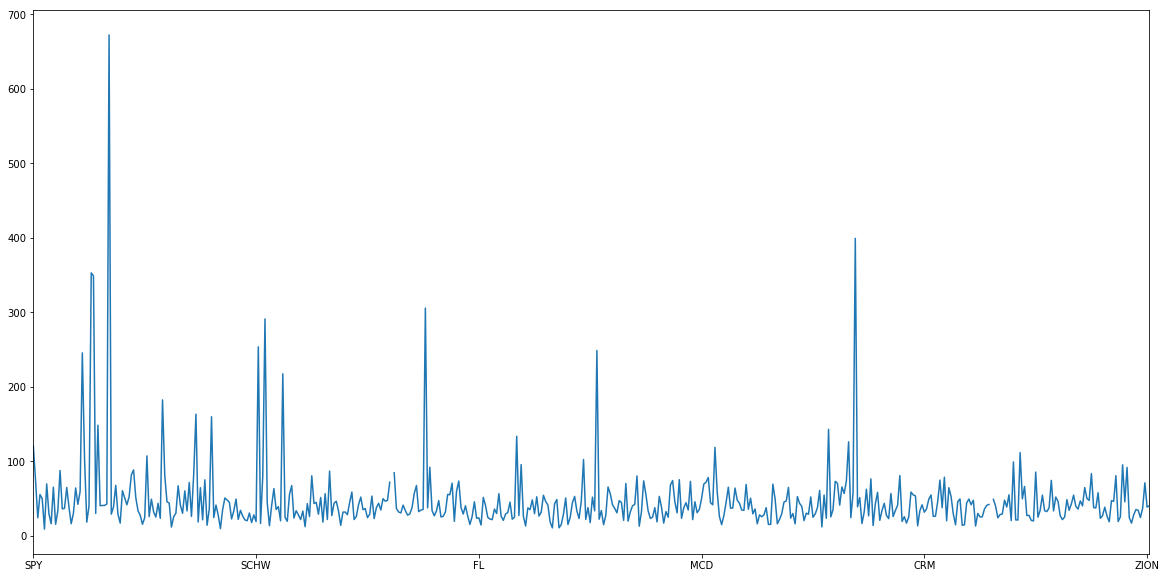

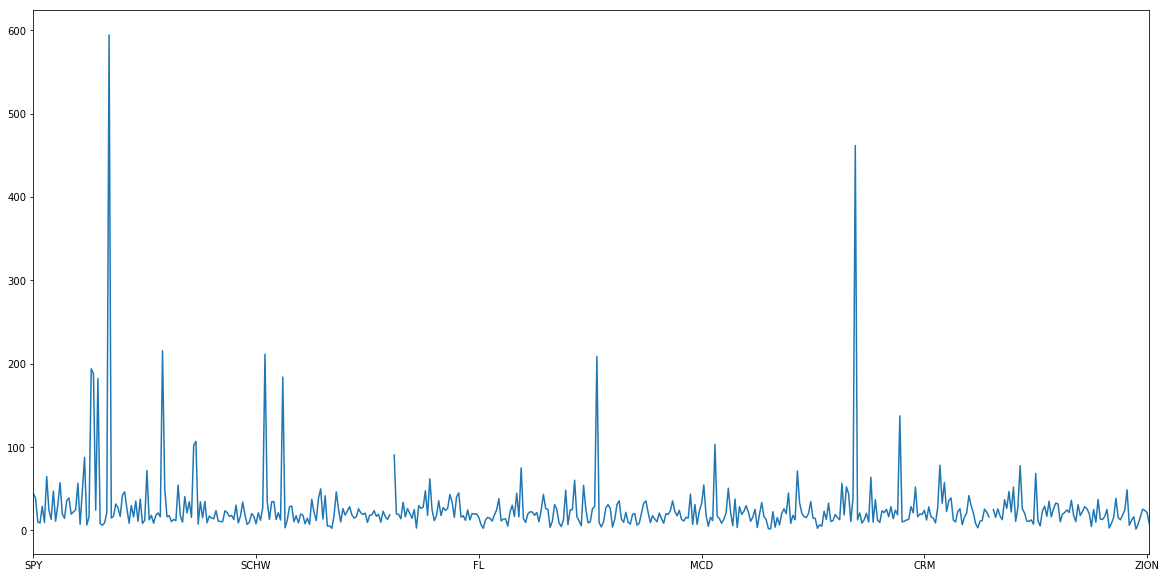

In [99]:
description_f_df.loc['mean'].plot()
plt.figure()
description_f_df.loc['std'].plot()

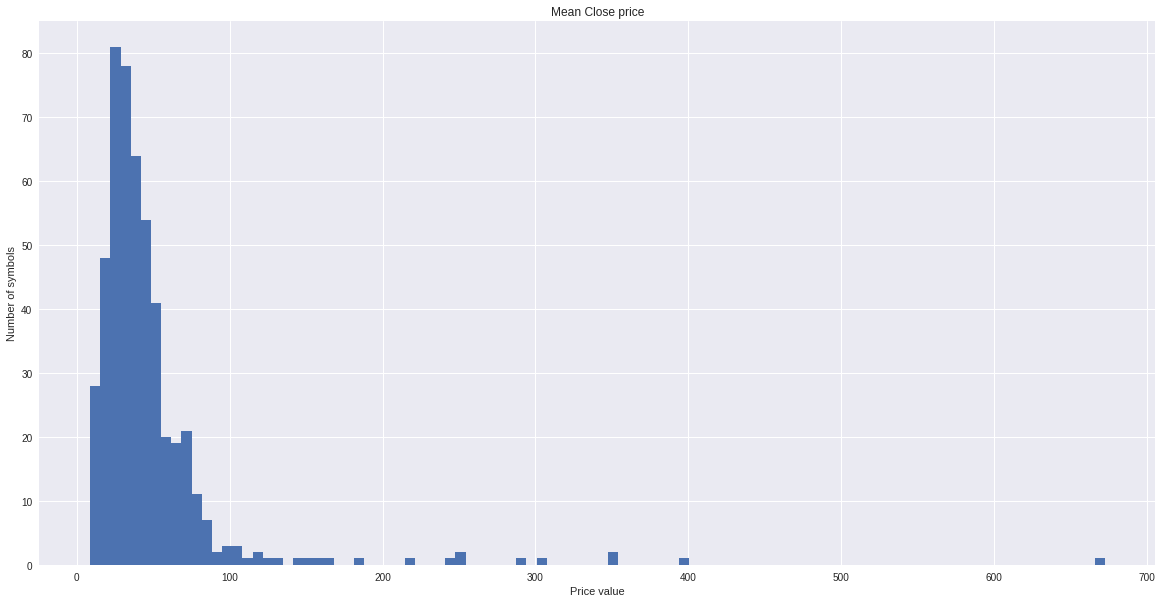

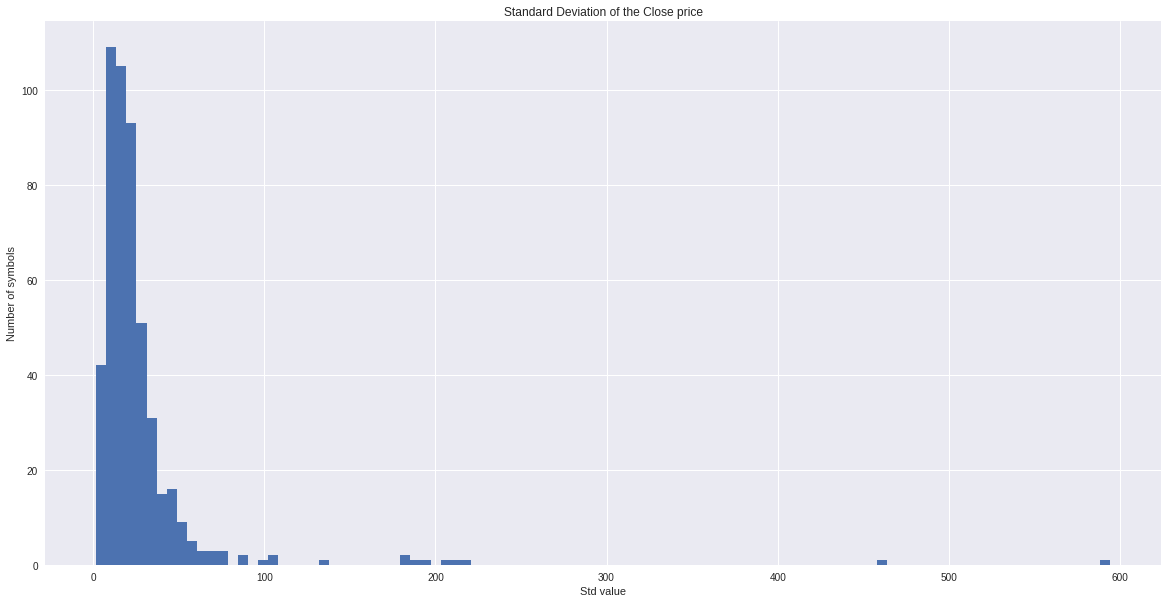

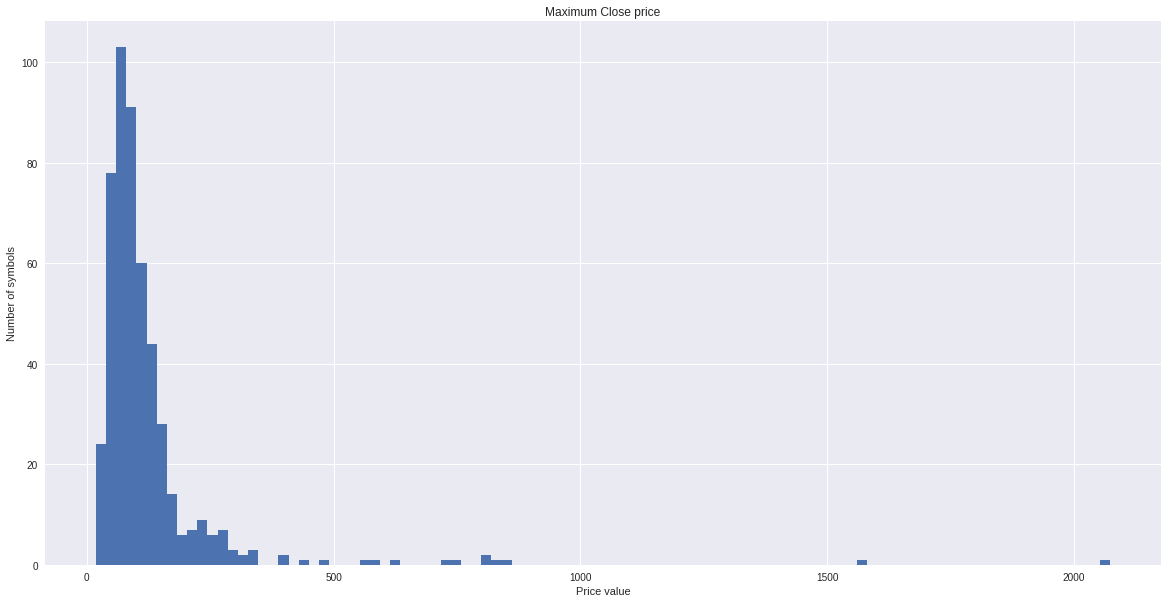

In [117]:
description_f_df.loc['mean'].hist(bins=100)
plt.title('Mean Close price')
plt.xlabel('Price value')
plt.ylabel('Number of symbols')
plt.figure()
description_f_df.loc['std'].hist(bins=100)
plt.title('Standard Deviation of the Close price')
plt.xlabel('Std value')
plt.ylabel('Number of symbols')
plt.figure()
description_f_df.loc['max'].hist(bins=100)
plt.title('Maximum Close price')
plt.xlabel('Price value')
plt.ylabel('Number of symbols')

In [104]:
description_f_df.loc['mean'].argmax()

'AIG'

In [119]:
description_f_df.loc['max'].argmax()

'AIG'

### From Yahoo Finance

American International Group, Inc. provides insurance products for commercial, institutional, and individual customers primarily in the United States, Europe, and Japan. The companys Commercial Insurance segment offers general liability, environmental, commercial automobile liability, workers compensation, excess casualty, and crisis management insurance products, as well as various risk-sharing and other customized structured programs; commercial, industrial, and energy-related property insurance; aerospace, political risk, trade credit, surety, and marine insurance; and various insurance products for small and medium sized enterprises. It also provides professional liability insurance products for a range of businesses and risks, including directors and officers liability, fidelity, employment practices, fiduciary liability, cybersecurity risk, kidnap and ransom, and errors and omissions insurance. This segment sells its products through independent retail and wholesale brokers. Its Consumer Insurance segment offers fixed annuities, fixed index annuities, variable annuities, and retail mutual funds; group mutual funds, fixed annuities, and variable annuities, as well as individual annuity and investment products, and financial planning and advisory services; and term life and universal life insurance. Its products include personal auto and property insurance, voluntary and sponsor-paid personal accident, and supplemental health products; travel insurance products; and extended warranty insurance. This segment sells its products through independent marketing organizations, independent insurance agents, financial advisors, direct marketing, banks, wirehouses, and broker-dealers. The company also provides stable value wrap products, and structured settlement and terminal funding annuities; and corporate- and bank-owned life insurance and guaranteed investment contracts. American International Group, Inc. was founded in 1919 and is based in New York, New York.

### The data seems ok this time.

## Let's filter the symbols with more than 1% missing data

In [108]:
from utils import preprocessing as pp

no_missing_df = pp.drop_irrelevant_symbols(filtered_pred_df, 0.99)
print(no_missing_df.shape)
no_missing_df.head()

(6024, 286)


,SPY,MMM,ABT,ADBE,AMD,AES,AET,AFL,APD,ALK,...,HCN,WDC,WY,WHR,WFM,WMB,XEL,XRX,XLNX,ZION
date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,43.94,24.50,6.88,2.59,18.75,4.41,6.42,4.49,21.94,4.19,...,22.50,4.50,41.50,46.12,1.81,6.88,22.00,14.28,2.50,10.94
1993-02-01,44.25,24.69,6.88,2.72,19.12,4.53,6.64,4.52,22.38,4.19,...,23.00,4.50,42.00,46.50,1.78,7.00,22.19,14.09,2.62,11.06
1993-02-02,44.34,24.72,6.53,2.84,20.25,4.53,6.62,4.57,22.31,4.16,...,22.75,4.62,42.12,46.50,1.78,6.98,22.06,14.09,2.64,11.12
1993-02-03,44.81,25.19,6.91,2.70,20.50,4.49,6.50,4.65,22.69,4.22,...,23.25,4.69,42.00,47.12,1.81,6.84,22.38,14.03,2.68,11.25
1993-02-04,45.00,26.06,6.84,2.73,20.12,4.49,6.73,4.84,23.19,4.38,...,23.00,4.56,42.62,48.38,1.84,6.90,22.81,14.15,2.67,11.69


### Let's check if the filtering was done ok.

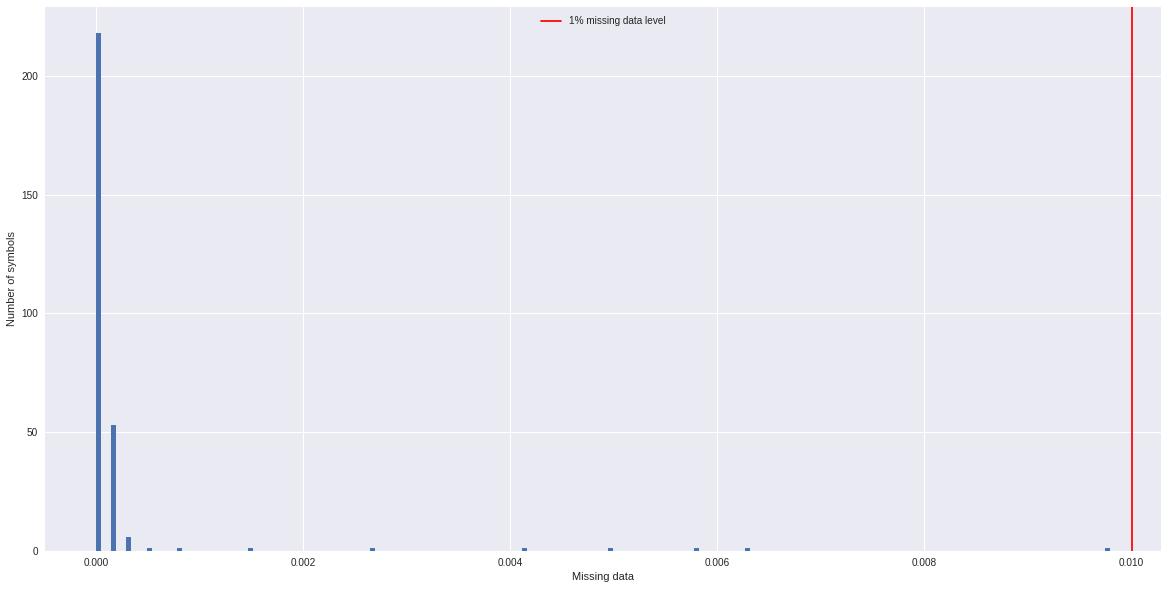

In [120]:
missing_df = no_missing_df.isnull().sum() / no_missing_df.shape[0]
missing_df.hist(bins=200)
plt.xlabel('Missing data')
plt.ylabel('Number of symbols')
plt.axvline(x=0.01, color='r', label='1% missing data level')
plt.legend(loc='upper center')

### Ok, that's good

There are too many symbols for a scatter matrix

## Let's look at the data used for the Automatic Trader

In [122]:
auto_data_df = data_df['SPY'].unstack()
print(auto_data_df.shape)
auto_data_df.head()

(6024, 5)


feature,Close,High,Low,Open,Volume
date,,,,,
1993-01-29,43.94,43.97,43.75,0.0,1003200.0
1993-02-01,44.25,44.25,43.97,0.0,480500.0
1993-02-02,44.34,44.38,44.12,0.0,201300.0
1993-02-03,44.81,44.84,44.38,0.0,529400.0
1993-02-04,45.00,45.09,44.88,0.0,531500.0


In [123]:
desc_auto_df = auto_data_df.describe()
desc_auto_df

feature,Close,High,Low,Open,Volume
count,6024.000000,6005.000000,6005.000000,6005.000000,6.024000e+03
mean,120.379515,121.140626,119.524448,97.583151,5.931430e+07
std,44.215695,44.437438,44.109630,69.694832,7.937370e+07
min,43.410000,43.530000,42.810000,0.000000,0.000000e+00
25%,92.847500,93.720000,91.600000,0.000000,5.380350e+06
50%,119.540000,120.290000,118.770000,115.300000,3.417315e+07
75%,141.412500,142.300000,140.570000,141.170000,7.948068e+07
max,227.760000,228.340000,227.000000,227.410000,8.141804e+08


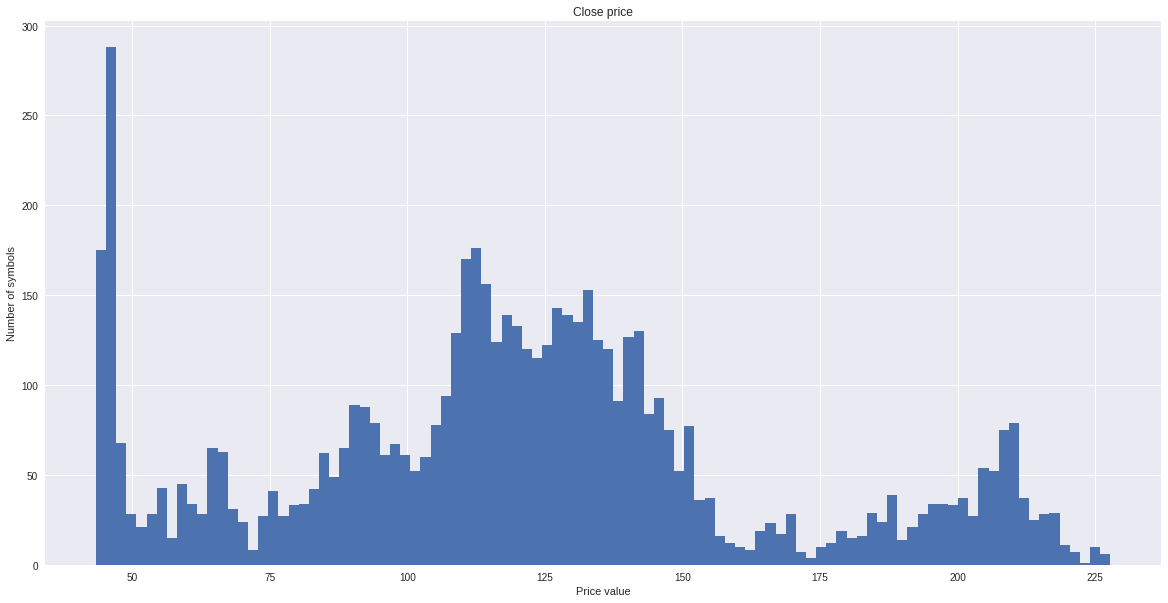

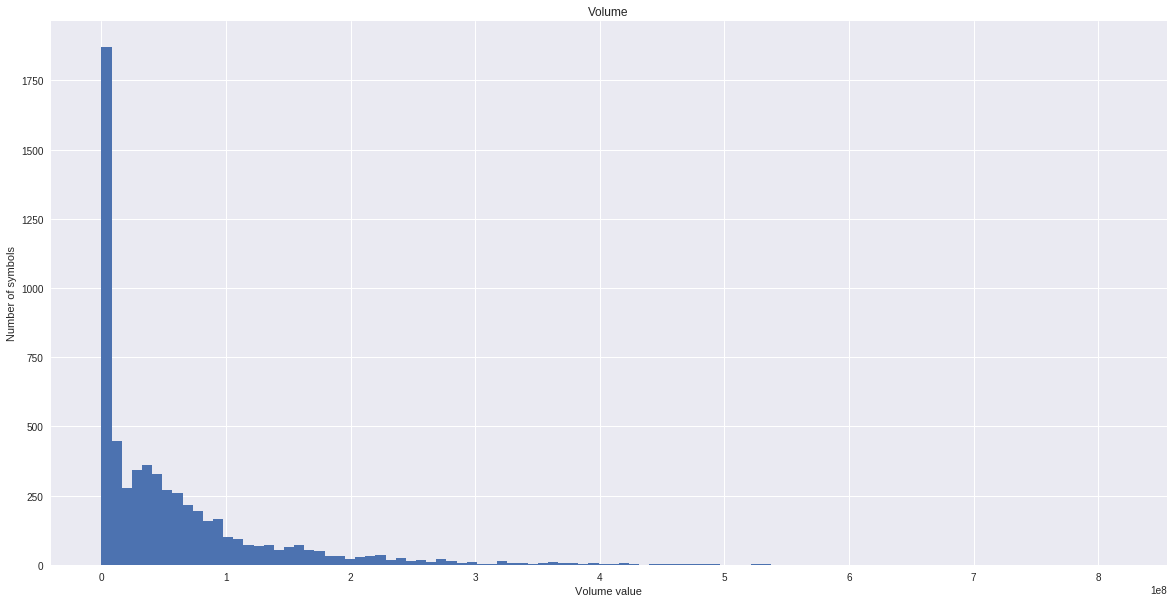

In [126]:
auto_data_df['Close'].hist(bins=100)
plt.title('Close price')
plt.xlabel('Price value')
plt.ylabel('Number of symbols')
plt.figure()
auto_data_df['Volume'].hist(bins=100)
plt.title('Volume')
plt.xlabel('Volume value')
plt.ylabel('Number of symbols')

/home/miguel/anaconda3/envs/cap_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


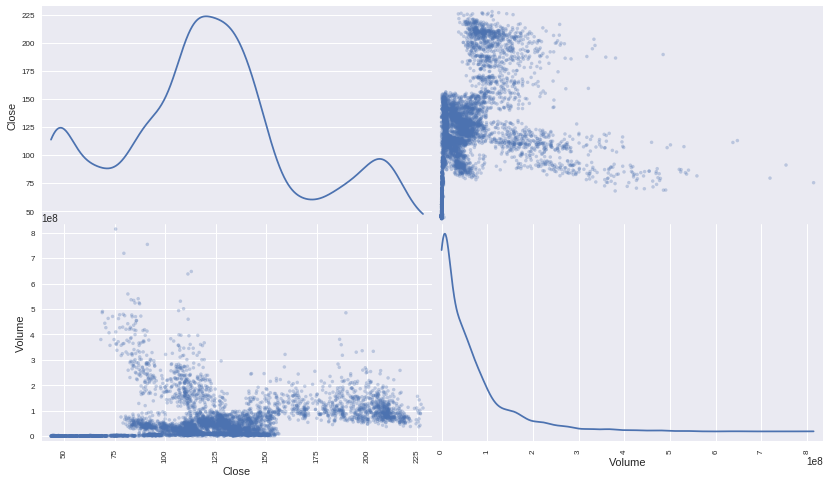

In [129]:
pd.scatter_matrix(auto_data_df[['Close', 'Volume']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');